<a href="https://colab.research.google.com/github/JOSELUISMILLA/NET8APIDEMO/blob/main/Bitcoin2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISIS DE DATOS BITCOIN**

Bitcoin es la criptomoneda más antigua y conocida, lanzada por primera vez como código abierto en 2009 por el anónimo Satoshi Nakamoto. Bitcoin sirve como un medio descentralizado de intercambio digital, con transacciones verificadas y registradas en un libro de contabilidad público distribuido (la cadena de bloques) sin la necesidad de una autoridad de registro confiable o un intermediario central. Los bloques de transacciones contienen un hash criptográfico SHA-256 de bloques de transacciones anteriores y, por lo tanto, están "encadenados" entre sí, sirviendo como un registro inmutable de todas las transacciones que alguna vez han ocurrido. Al igual que con cualquier moneda/producto básico en el mercado, el comercio de bitcoins y los instrumentos financieros pronto siguieron a la adopción pública de bitcoin y continúan creciendo. Aquí se incluyen datos históricos del mercado de bitcoins en intervalos de 1 minuto para intercambios de bitcoins seleccionados donde se realizan transacciones.

Data : bitcoin.csv

Librerias a importar


In [42]:
#Importar Librerias
import random
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime   #Fecha
import multiprocessing
import numpy as np
import pandas as pd



In [4]:
# Lectura de datos https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory
#Datos fuentes: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

df1 = pd.read_csv('coin_Bitcoin.csv')


In [5]:
#Lectura de datos
df2 = pd.read_csv('bitcoin.csv')

In [ ]:
df1

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


Analisis de datos

In [6]:
#Analizar Datos
#Numero de registro , #Numero de Columnas y Tipos de Columnas
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [ ]:
df1.describe()

In [7]:
#Valores Faltantes
df1.isnull().sum

<bound method DataFrame.sum of         SNo   Name  Symbol   Date   High    Low   Open  Close  Volume  \
0     False  False   False  False  False  False  False  False   False   
1     False  False   False  False  False  False  False  False   False   
2     False  False   False  False  False  False  False  False   False   
3     False  False   False  False  False  False  False  False   False   
4     False  False   False  False  False  False  False  False   False   
...     ...    ...     ...    ...    ...    ...    ...    ...     ...   
2986  False  False   False  False  False  False  False  False   False   
2987  False  False   False  False  False  False  False  False   False   
2988  False  False   False  False  False  False  False  False   False   
2989  False  False   False  False  False  False  False  False   False   
2990  False  False   False  False  False  False  False  False   False   

      Marketcap  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
2986      False  
2987      False  
2988      False  
2989      False  
2990      False  

[2991 rows x 10 columns]>

In [ ]:
#Eliminar PrimerCOlumna
df1.dropna(axis=1)
df1

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [8]:
df1['Date']=pd.to_datetime(df1['Date'])

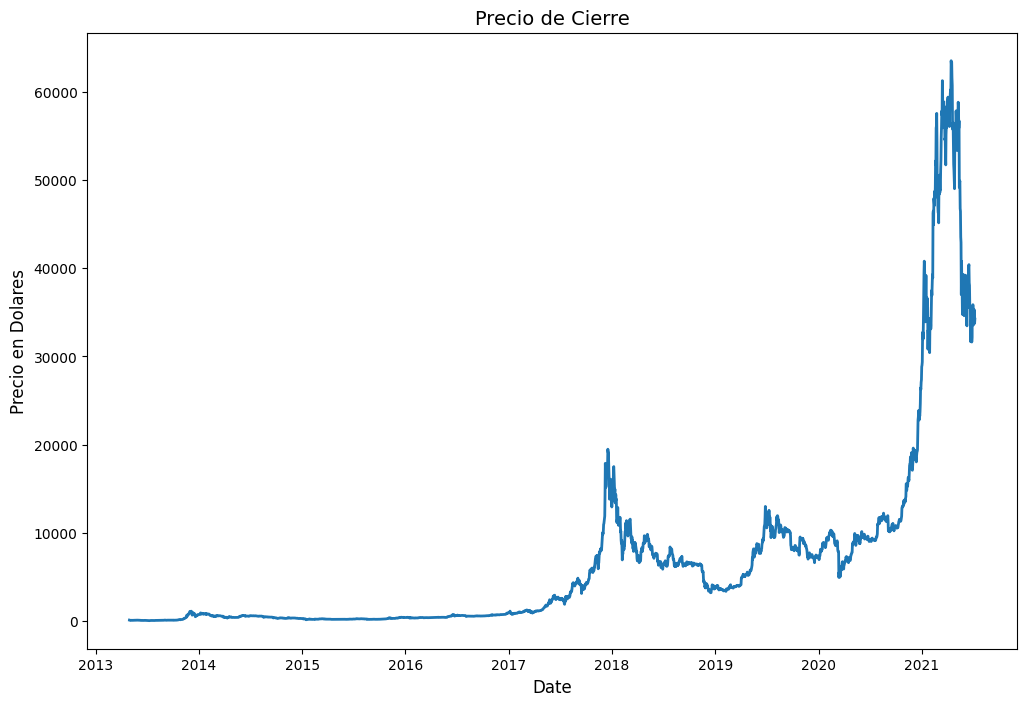

In [9]:
#Mostrar Precio de cierre
df1["Date"] =pd.to_datetime(df1.Date,format="%Y-%m-%d")
df1.index=df1['Date']
plt.figure(figsize =(12,8))
plt.plot(df1["Close"], linewidth=2)
plt.xlabel('Date',fontsize =12)
plt.ylabel('Precio en Dolares',fontsize =12)
plt.title('Precio de Cierre',fontsize =14)
plt.show() #mostrar

In [10]:
#Analizar Datos
#Numero de registro , #Numero de Columnas y Tipos de Columnas
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587472 entries, 0 to 4587471
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  object 
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(5), object(1)
memory usage: 210.0+ MB


In [11]:
df2['Date']=pd.to_datetime(df2['Timestamp'])

In [ ]:
df2

,Timestamp,Open,High,Low,Close,Volume,Date
Date,,,,,,,
2024-09-13 04:00:00,2024-09-13 04:00:00,57854.00,57864.00,57835.00,57835.00,1.353466,2024-09-13 04:00:00
2024-09-13 03:59:00,2024-09-13 03:59:00,57854.00,57854.00,57854.00,57854.00,0.252322,2024-09-13 03:59:00
2024-09-13 03:58:00,2024-09-13 03:58:00,57875.00,57875.00,57842.00,57842.00,1.271825,2024-09-13 03:58:00
2024-09-13 03:57:00,2024-09-13 03:57:00,57875.00,57877.00,57875.00,57877.00,0.288940,2024-09-13 03:57:00
2024-09-13 03:56:00,2024-09-13 03:56:00,57876.00,57876.00,57876.00,57876.00,0.000550,2024-09-13 03:56:00
...,...,...,...,...,...,...,...
2012-01-01 05:05:00,2012-01-01 05:05:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 05:05:00
2012-01-01 05:04:00,2012-01-01 05:04:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 05:04:00
2012-01-01 05:03:00,2012-01-01 05:03:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 05:03:00


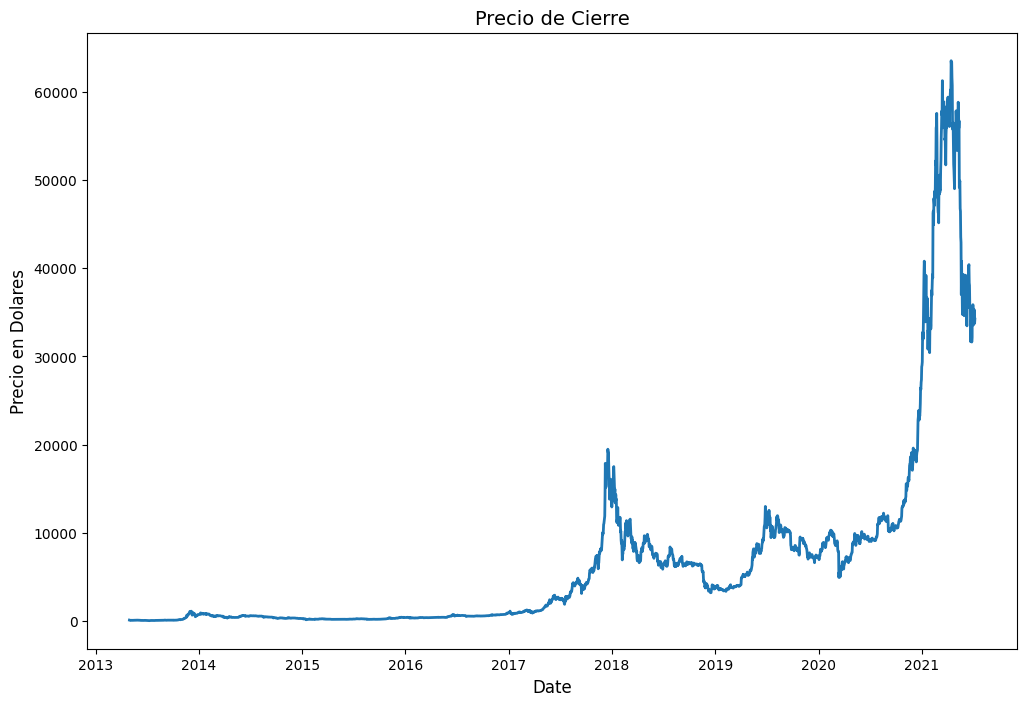

In [12]:
#Mostrar Precio de cierre
df2["Date"] =pd.to_datetime(df2.Date,format="%Y-%m-%d")
df2.index=df2['Date']
plt.figure(figsize =(12,8))
plt.plot(df1["Close"], linewidth=2)
plt.xlabel('Date',fontsize =12)
plt.ylabel('Precio en Dolares',fontsize =12)
plt.title('Precio de Cierre',fontsize =14)
plt.show() #mostrar

In [13]:
#Cálculos de promedios
import random
import concurrent.futures
import multiprocessing
import matplotlib.pyplot as plt

In [14]:
# Función de mapeo: calcular el promedio de una observación
def map_function(df2):
    total = sum(df2.High)
    return total / len(df2.High)

In [ ]:
df2

,Timestamp,Open,High,Low,Close,Volume,Date
Date,,,,,,,
2024-09-13 04:00:00,2024-09-13 04:00:00,57854.00,57864.00,57835.00,57835.00,1.353466,2024-09-13 04:00:00
2024-09-13 03:59:00,2024-09-13 03:59:00,57854.00,57854.00,57854.00,57854.00,0.252322,2024-09-13 03:59:00
2024-09-13 03:58:00,2024-09-13 03:58:00,57875.00,57875.00,57842.00,57842.00,1.271825,2024-09-13 03:58:00
2024-09-13 03:57:00,2024-09-13 03:57:00,57875.00,57877.00,57875.00,57877.00,0.288940,2024-09-13 03:57:00
2024-09-13 03:56:00,2024-09-13 03:56:00,57876.00,57876.00,57876.00,57876.00,0.000550,2024-09-13 03:56:00
...,...,...,...,...,...,...,...
2012-01-01 05:05:00,2012-01-01 05:05:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 05:05:00
2012-01-01 05:04:00,2012-01-01 05:04:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 05:04:00
2012-01-01 05:03:00,2012-01-01 05:03:00,4.58,4.58,4.58,4.58,0.000000,2012-01-01 05:03:00


In [15]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=ea25617173c4372ac2b195b6530e2c649c7d66ec8a643a9024acf8176808746e
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [16]:
# Importar librerías necesarias
import matplotlib.pyplot as plt  # Importar la librería para visualización
from pyspark.sql import SparkSession  # Importar la clase SparkSession para crear una sesión de Spark
from pyspark.sql.functions import col, avg, sum, count, when, concat, substring, date_add, lit  # Importar funciones para operaciones en DataFrame
from pyspark.sql.types import StructType, StructField, StringType, FloatType, DateType  # Importar tipos de datos para definir el esquema
from pyspark.sql.window import Window  # Importar módulo para operaciones de ventana en DataFrame
from pyspark.sql.functions import row_number, rank  # Importar funciones para cálculos de ranking en DataFrame
from pyspark.sql.functions import expr  # Importar función expr para cálculos de expresiones
from pyspark.sql.functions import udf  # Importar función udf para definir funciones definidas por el usuario
from pyspark.sql.types import IntegerType  # Importar tipo de dato IntegerType

# Crear una sesión de Spark
spark = SparkSession.builder.appName("bitcoin").getOrCreate()


In [17]:
df3 = pd.DataFrame(df2)

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4587472 entries, 2024-09-13 04:00:00 to 2015-12-24 02:49:00
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Timestamp  object        
 1   Open       float64       
 2   High       float64       
 3   Low        float64       
 4   Close      float64       
 5   Volume     float64       
 6   Date       datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 280.0+ MB


In [19]:
df3=df3.drop(columns = ['Timestamp'])


In [20]:
df3.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2024-09-13 04:00:00,57854.0,57864.0,57835.0,57835.0,1.353466,2024-09-13 04:00:00
2024-09-13 03:59:00,57854.0,57854.0,57854.0,57854.0,0.252322,2024-09-13 03:59:00
2024-09-13 03:58:00,57875.0,57875.0,57842.0,57842.0,1.271825,2024-09-13 03:58:00
2024-09-13 03:57:00,57875.0,57877.0,57875.0,57877.0,0.288940,2024-09-13 03:57:00
2024-09-13 03:56:00,57876.0,57876.0,57876.0,57876.0,0.000550,2024-09-13 03:56:00


In [21]:
# Definimos el esquema del DataFrame que vamos a crear.
schema = StructType([

    StructField("Open", FloatType(), True),
      StructField("High", FloatType(), True),
     StructField("Low", FloatType(), True),
    StructField("Close", FloatType(), True),
    StructField("Volume", FloatType(), True),
    StructField("Date", DateType(), True)
])

In [22]:
# Creamos un DataFrame utilizando Spark, pasando los datos y el esquema definido.
df4 = spark.createDataFrame(df3, schema)

In [23]:
df4 = df4.withColumn("Name", lit("Bitcoin"))

In [26]:
df4

DataFrame[Open: float, High: float, Low: float, Close: float, Volume: float, Date: date, Name: string]

In [27]:
# Realizamos una transformación en el DataFrame, agregando una nueva columna "delta" que contiene calcula la variacion del precio con respecto al anterior
transformed_df = df4.withColumn("Delta", col("Close") - col("Open"))

In [28]:
transformed_df = df4.withColumn("Name", lit("Bitcoin"))

In [29]:
# Realizamos un filtrado en el DataFrame para seleccionar las filas donde la fecha sea de 1 mes
filtered_df = df4.filter((col("Date") >= '2023-02-01') & (col("Date") <= '2023-03-31'))

In [30]:
# Visualización 1: Resultado del DataFrame transformado
#transformed_df.show()
filtered_df.show()

+-------+-------+-------+-------+----------+----------+-------+
|   Open|   High|    Low|  Close|    Volume|      Date|   Name|
+-------+-------+-------+-------+----------+----------+-------+
|28481.0|28481.0|28476.0|28476.0|0.31017667|2023-03-31|Bitcoin|
|28480.0|28481.0|28480.0|28481.0|   0.01407|2023-03-31|Bitcoin|
|28490.0|28490.0|28477.0|28481.0|0.06673948|2023-03-31|Bitcoin|
|28491.0|28491.0|28489.0|28489.0|   0.00488|2023-03-31|Bitcoin|
|28478.0|28485.0|28478.0|28485.0|0.01957812|2023-03-31|Bitcoin|
|28483.0|28483.0|28481.0|28481.0| 0.8357273|2023-03-31|Bitcoin|
|28483.0|28483.0|28480.0|28482.0| 0.4139692|2023-03-31|Bitcoin|
|28487.0|28488.0|28482.0|28482.0|0.07575619|2023-03-31|Bitcoin|
|28497.0|28498.0|28487.0|28488.0|0.02725597|2023-03-31|Bitcoin|
|28507.0|28507.0|28489.0|28503.0|0.42903414|2023-03-31|Bitcoin|
|28501.0|28503.0|28501.0|28503.0|0.17771412|2023-03-31|Bitcoin|
|28498.0|28502.0|28498.0|28502.0|0.09087986|2023-03-31|Bitcoin|
|28506.0|28506.0|28499.0|28499.0|0.02618

In [31]:
from pyspark.sql.functions import to_date, col, year

In [32]:
#Convertir fecha en año
groupedfechayear_df = df4.withColumn("Date", to_date(col("Date"), "d/MM/yyyy"))\
    .withColumn('year', year("Date"))

groupedfechayear_df.show()
#Filtrar por año y suma los precios precios
groupedfechayear_df.groupBy("year").sum("High").show()

+-------+-------+-------+-------+----------+----------+-------+----+
|   Open|   High|    Low|  Close|    Volume|      Date|   Name|year|
+-------+-------+-------+-------+----------+----------+-------+----+
|57854.0|57864.0|57835.0|57835.0| 1.3534662|2024-09-13|Bitcoin|2024|
|57854.0|57854.0|57854.0|57854.0|0.25232178|2024-09-13|Bitcoin|2024|
|57875.0|57875.0|57842.0|57842.0|  1.271825|2024-09-13|Bitcoin|2024|
|57875.0|57877.0|57875.0|57877.0|   0.28894|2024-09-13|Bitcoin|2024|
|57876.0|57876.0|57876.0|57876.0|    5.5E-4|2024-09-13|Bitcoin|2024|
|57881.0|57881.0|57870.0|57870.0|0.12934981|2024-09-13|Bitcoin|2024|
|57855.0|57888.0|57854.0|57888.0| 2.3626766|2024-09-13|Bitcoin|2024|
|57890.0|57890.0|57855.0|57855.0| 3.4410312|2024-09-13|Bitcoin|2024|
|57904.0|57904.0|57890.0|57892.0|0.48487547|2024-09-13|Bitcoin|2024|
|57910.0|57917.0|57910.0|57914.0|0.04053806|2024-09-13|Bitcoin|2024|
|57903.0|57912.0|57903.0|57905.0|0.24966273|2024-09-13|Bitcoin|2024|
|57913.0|57913.0|57897.0|57897.0|0

In [35]:
# Realizamos una operación de agrupación en el DataFrame `df` usando el atributo "name".
# Luego aplicamos diferentes funciones de agregación: promedio de precio mas alto, suma de del campo volumen y conteo total de filas.
grouped_df = groupedfechayear_df.groupBy("year").agg(avg("High"), sum("Volume"), count("*"))
# Visualización 2: Resultado del DataFrame agrupado
grouped_df.show()

+----+------------------+------------------+--------+
|year|         avg(High)|       sum(Volume)|count(1)|
+----+------------------+------------------+--------+
|2023|28817.109934011427| 681687.3219340808|  525600|
|2022|28238.729139774037| 833815.3460338349|  525600|
|2020|11080.471016477713|3074321.0451704105|  527040|
|2024| 59868.11629676419| 556203.7380620056|  368441|
|2021| 47414.96859815717| 1802997.835069673|  525600|
|2018| 7530.281606364025| 3932327.010006373|  525600|
|2015|               NaN|               NaN|   11351|
|2019| 7356.735966895349|2994600.1279287837|  525600|
|2016| 565.9467895008682|1992257.9788814783|  527040|
|2017| 3952.202546059363| 4698752.659595984|  525600|
+----+------------------+------------------+--------+



In [43]:
df4.head()

Row(Open=57854.0, High=57864.0, Low=57835.0, Close=57835.0, Volume=1.3534661531448364, Date=datetime.date(2024, 9, 13), Name='Bitcoin')

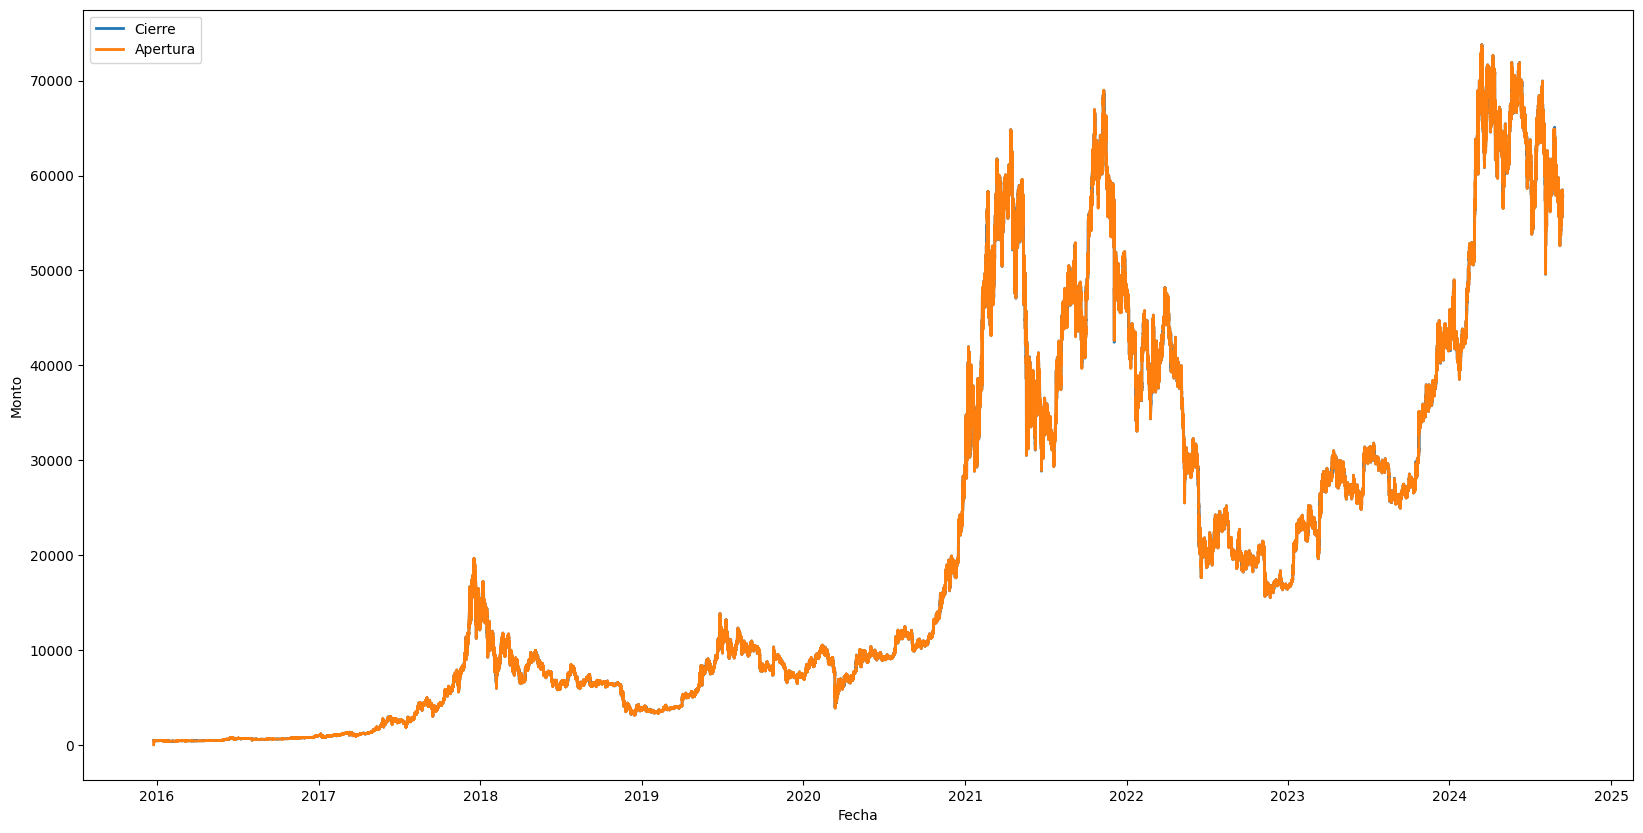

In [58]:
#Comporando precio de apertura y cierre por años / Utilizando DF3 dataframe
import matplotlib.pyplot as plt
import numpy as np

plt.figure (figsize=(20, 10))
plt.plot(df3['Date'],df3['Close'], label ='Cierre', linewidth=2)
plt.plot(df3['Date'], df3['Open'], label ='Apertura',linewidth=2)
plt.legend(loc='best')
plt.xlabel("Fecha")
plt.ylabel("Monto")
plt.show()

In [64]:
# Calcular estadísticas descriptivas
from pyspark.sql.functions import col, avg, median  # Importar funciones para operaciones en DataFrame
stats = groupedfechayear_df.describe().toPandas()  # Calcular estadísticas y convertirlas a DataFrame de Pandas
average_High = float(stats.loc[1, "High"])  # Extraer el valor promedio del precio "High"
median_Low = float(filtered_df.select(median("Low")).first()[0])  # Extraer la mediana del precio del bitcoin "Low"

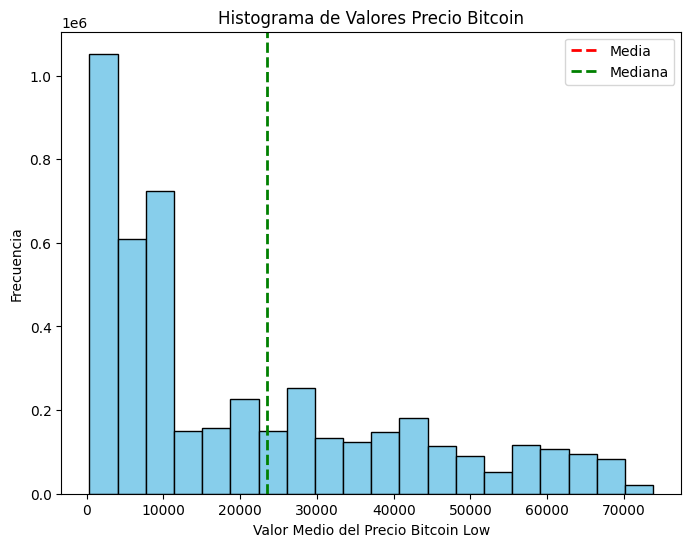

In [66]:
# Visualización: Histograma de valores medios del Precio alto (High) del bitocin
medval_values = groupedfechayear_df.select("High").rdd.flatMap(lambda x: x).collect()  # Extraer valores de "High" y convertir a lista
plt.figure(figsize=(8, 6))  # Crear una figura para la visualización
plt.hist(medval_values, bins=20, color='skyblue', edgecolor='black')  # Crear un histograma de los valores con opciones de estilo
plt.title("Histograma de Valores Precio Bitcoin")  # Establecer título del gráfico
plt.xlabel("Valor Medio del Precio Bitcoin Low")  # Etiqueta del eje x
plt.ylabel("Frecuencia")  # Etiqueta del eje y
plt.axvline(average_High, color='red', linestyle='dashed', linewidth=2, label='Media')  # Agregar línea punteada roja para la media
plt.axvline(median_Low, color='green', linestyle='dashed', linewidth=2, label='Mediana')  # Agregar línea punteada verde para la mediana
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar la visualización